{
    "0": 0, 
    "1": 1, 
    "3": 1, 
    "4": 1, 
    "5": 1
}
0.384615384615


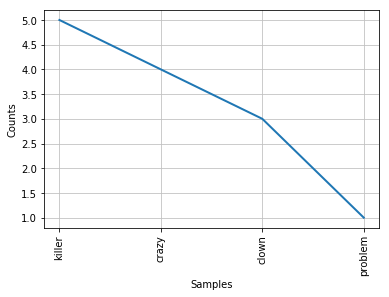

In [1]:
%matplotlib inline

from nltk import corpus
from nltk.probability import FreqDist, SimpleGoodTuringProbDist
from itertools import chain, islice
import json

def print_3col(value1, value2, value3):
    width1, width2, width3 = 25,25,25
    print "{:<{col1}} {:<{col2}} {:<{col3}}".format(value1,value2,value3,col1=width1,col2=width2,col3=width3)

class SortedDisplayDict(dict):
    def __str__(self):
        return "\n".join("%r: %r" % (key, self[key]) for key in sorted(self))

sents = ["killer clown", "killer killer", "crazy problem", "crazy clown", "crazy killer", "clown crazy killer"]
data = [i for s in sents for i in s.split()]
fd = FreqDist(data)
print json.dumps(fd.r_Nr(), indent=4)
print fd.freq("killer")
fd.plot()

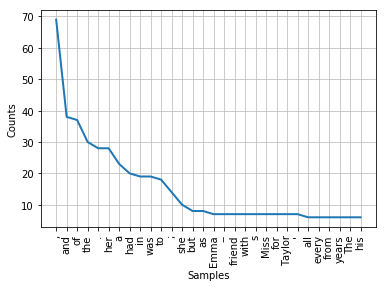

  , and  of the   . her   a had  in was 
 69  38  37  30  28  28  23  20  19  19 
Some words have frequency zero:
zombie: 0.0
0: 0
1: 288
2: 57
3: 18
4: 11
5: 4
6: 8
7: 9
8: 2
10: 1
14: 1
18: 1
19: 2
20: 1
23: 1
28: 2
30: 1
37: 1
38: 1
69: 1
Max r value: 70
Some words that occur only once in the data:
comparatively
ceased
sleep
children
seemed
devoted
vex
woman
wished
difference


In [2]:
emma_words = islice(corpus.gutenberg.words('austen-emma.txt'), 1000)
fd = FreqDist(emma_words)
fd.plot(30)
fd.tabulate(10)

print "Some words have frequency zero:"
print "zombie:", fd.freq('zombie')

r_Nr = fd.r_Nr()
print SortedDisplayDict(r_Nr)
max_r = max(r_Nr.keys(), key=int)+1
print "Max r value:", max_r

print "Some words that occur only once in the data:"
h = fd.hapaxes()
print "\n".join(h[:10])

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.corpus import gutenberg

gut_ngrams = ( ngram for sent in gutenberg.sents() for ngram in ngrams(sent, 3, pad_left = True, pad_right = True, right_pad_symbol='EOS', left_pad_symbol="BOS"))
freq_dist = nltk.FreqDist(gut_ngrams)
kneser_ney = nltk.KneserNeyProbDist(freq_dist)

prob_sum = 0
for i in kneser_ney.samples():
    if i[0] == "I" and i[1] == "confess":
        prob_sum += kneser_ney.prob(i)
        print("{0}:{1}".format(i, kneser_ney.prob(i)))
    print(prob_sum)

In [3]:
sgt = SimpleGoodTuringProbDist(fd)

print sgt.smoothedNr(19)
for r in range(1,max_r+1):
    print_3col(r, r_Nr[r], sgt.smoothedNr(r))

fd_keys_sorted=(key for key, value in sorted(fd.items(), key=lambda item: item[1], reverse=True))
fd_keys_rev_sorted=(key for key, value in sorted(fd.items(), key=lambda item: item[1], reverse=False))

print('%18s %8s  %14s' % ("word", "frequency", "SimpleGoodTuring"))
for key in islice(fd_keys_sorted, 10):
    print('%18s %8d  %14e' % (key, fd[key], sgt.prob(key)))

print

print('%18s %8s  %14s' % ("word", "frequency", "SimpleGoodTuring"))    
for key in islice(fd_keys_rev_sorted, 10):
    print('%18s %8d  %14e' % (key, fd[key], sgt.prob(key)))

0.474827842107
1                         288                       182.635402673            
2                         57                        44.9822774355            
3                         18                        19.8182953633            
4                         11                        11.0789324176            
5                         4                         7.05652127023            
6                         8                         4.88115692402            
7                         9                         3.57426955255            
8                         2                         2.72869117599            
9                         0                         2.15054050505            
10                        1                         1.73798941969            
11                        0                         1.4334094028             
12                        0                         1.20220697493            
13                        0                      